<a href="https://colab.research.google.com/github/swarangimp05/NNDL-LAB/blob/main/DeepEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
print("")

## Seeding

In [8]:

np.random.seed(42)
tf.random.set_seed(42)

**Loading the MNIST dataset and then normalizing the images.**

In [9]:

dataset = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
H = 28
W = 28
C = 1

## Flattening the images.
x_train = np.reshape(x_train, (-1, H * W * C))
x_test = np.reshape(x_test, (-1, H * W * C))
print(x_train.shape, x_test.shape)

## Latent space
latent_dim = 32

(60000, 784) (10000, 784)


## Building the autoencoder

In [11]:

inputs = Input(shape=(H*W*C,))
e = Dense(256, activation="relu")(inputs)
h = Dense(latent_dim, activation="relu")(e)
d = Dense(256, activation="relu")(h)
outputs = Dense(H*W*C, activation="sigmoid")(d)

autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(1e-3), loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 32)                8224      
                                                                 
 dense_6 (Dense)             (None, 256)               8448      
                                                                 
 dense_7 (Dense)             (None, 784)               201488    
                                                                 
Total params: 419,120
Trainable params: 419,120
Non-trainable params: 0
_________________________________________________________________


## Training the autoencoder

In [12]:

autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test)
)

Epoch 1/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2201 - val_loss: 0.1520
Epoch 2/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1324 - val_loss: 0.1166
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1115 - val_loss: 0.1050
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1026 - val_loss: 0.0990
Epoch 5/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0981 - val_loss: 0.0957
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0952 - val_loss: 0.0936
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0931 - val_loss: 0.0917
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0915 - val_loss: 0.0903
Epoch 9/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0902 - val_loss: 0.0893
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0891 - val_lo

In [13]:
test_pred_y = autoencoder.predict(x_test)

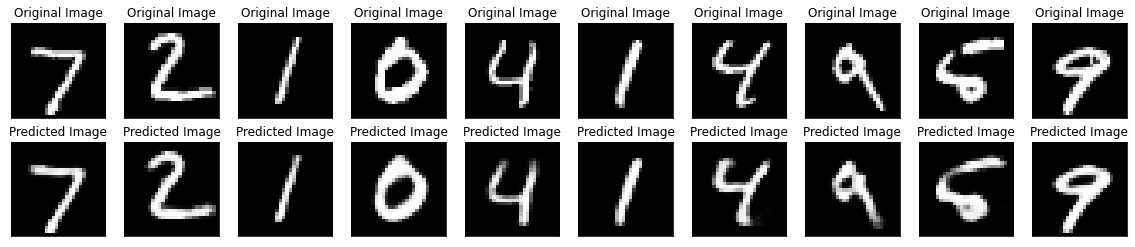

In [14]:
n = 10  ## how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ## display original
    ax = plt.subplot(2, n, i + 1)
    ax.set_title("Original Image")
    plt.imshow(x_test[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ## display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    ax.set_title("Predicted Image")
    plt.imshow(test_pred_y[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)